In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 3 : MNIST Classification

It is the dataset of hand written digits images collected by NIST.



Importing the libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import cv2
import os
import gzip
import shutil
import codecs

### Getting the dataset path and getting the names of the images

In [0]:
path='/content/drive/My Drive/A3Q3/'
files = os.listdir(path)

In [4]:
files

['train-labels-idx1-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 't10k-images-idx3-ubyte']


### **Extracting the images for the binary file**

<pre>
for file in files:
    if file.endswith('gz'):
        print('Extracting ',file)
        with gzip.open(datapath+file, 'rb') as f_in:
            with open(datapath+file.split('.')[0], 'wb') as f_out:
                shutil.copyfileobj(f_in, f_out)
print('Extraction Complete')<pre>

### function to convert the 32 bit (4 bytes) into integer

In [0]:
def get_int(b):
    return int(codecs.encode(b, 'hex'), 16)

### Creating the dataset by parsing the files


### 1. First searching for the files which ends with ubyte
### 2. open each file in rb mode.
### 3. reading first 4 bytes (0-3) of it
    
###    a. if it is 2051 : then 
        it contains images
        1. read next 4 bytes(4-7) : No. of images
        2. read next 4 bytes(8-11) : No. of rows
        3. read next 4 bytes(8-11) : No. of columns
        4. read remaining (from 16 to end of file) that contain the images into buffer
        5. reshape the buffer by np.reshape(No. of images, No. of rows, No. of columns)
        
        
###    b. if it is 2049: then 
        it contains labels
        1. read next 4 bytes(4-7) : No. of labels
        2. read remaining (from 8 to end of file) that contain the labels into buffer
        3. reshape the buffer by np.reshape(No. of labels)


In [6]:
data_dict = {}

for file in files:
    #print(file[-5:])
    if file[-5:]=='ubyte': 
        #print(file)
        
        f=open(path+file,'rb')
        data = f.read()
        
        
        type_of_data = get_int(data[:4])   # MAGIC NUMBER TO WHETHER IMAGE OR LABEL
        length = get_int(data[4:8])        # 4-7: LENGTH 
        
        
        if (length==10000):
                dataset_type = 'test'
        elif (length==60000):
                dataset_type = 'train'
        
        
        if (type_of_data == 2051):
            category = 'images'
            num_rows = get_int(data[8:12])  # ROWS  
            num_cols = get_int(data[12:16])  # COLUMNS
            ds = np.frombuffer(data,dtype = np.uint8, offset = 16)  
            print(len(ds))
            ds = ds.reshape(length,num_rows,num_cols)
            print(ds.shape)
        elif(type_of_data == 2049):
            category = 'labels'
            ds = np.frombuffer(data, dtype=np.uint8, offset=8)
            print(len(ds))
            ds = ds.reshape(length)
            print(ds.shape)
            
        data_dict[dataset_type+'_'+category] = ds

60000
(60000,)
10000
(10000,)
47040000
(60000, 28, 28)
7840000
(10000, 28, 28)


In [7]:
data_dict

{'test_images': array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0,

In [0]:
X_train=data_dict['train_images']
X_test=data_dict['test_images']
y_train=data_dict['train_labels']
y_test=data_dict['test_labels']

### Understanding the dataset by visualizing it

label:  0


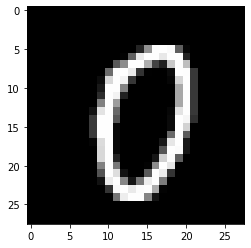

In [9]:
print("label: ",y_train[1000])
plt.imshow(X_train[1000],cmap='gray')
plt.show()

### Another plot in more intitutive way

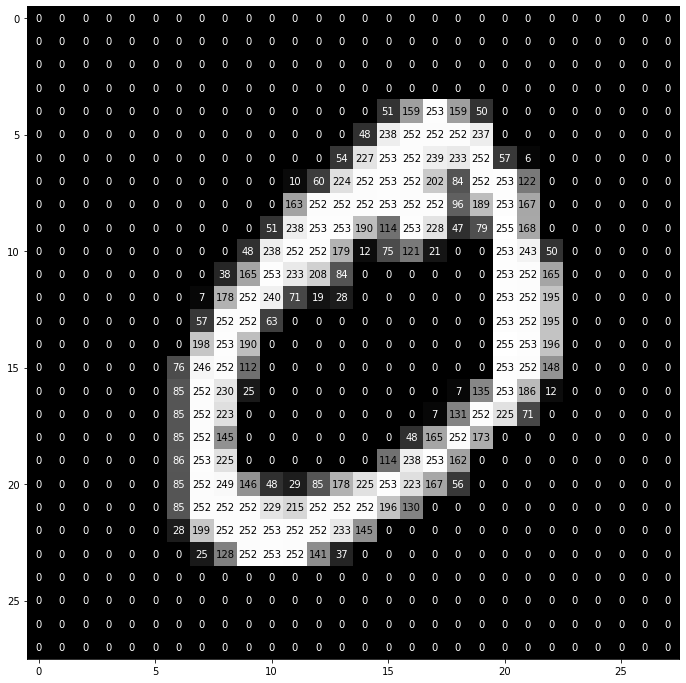

In [10]:
img = np.squeeze(X_train[1])

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

### Counts of digits in the dataset

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


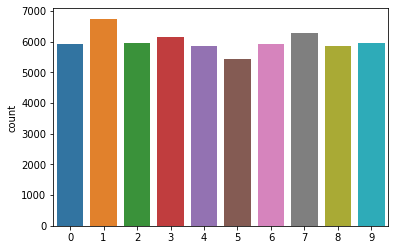

In [11]:
import seaborn as sns
print(np.unique(y_train, return_counts=True))
sns.countplot(y_train)
plt.show()

### Reshaping the dataset for applying the algorithm:

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

### Normalizing the dataset

In [0]:
X_train /= 255
X_test /= 255

### Calculate and Report useful metrics for the model like

    1. Accuracy Score
    2. Precision
    3. Recall 
    4. F1-Score
    5. Confusion matrix
    6. Classification report

    So for simplicity, I have made the function which calculates all these things and we don't have to write the code again and again.

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



def calc_report_metrics(testlabels,pred):
    cm=confusion_matrix(testlabels,pred)
    print('Confusion Matrix : \n\n',cm)
    print()
    accu = accuracy_score(testlabels,pred)
    print('Accuracy : ',accu)
    print()
    precision = precision_score(testlabels,pred,average='macro')
    print('Precision : ',precision)
    print()
    recall = recall_score(testlabels,pred,average='macro')
    print('Recall : ',recall)
    print()
    f1s = f1_score(testlabels,pred,average='macro')
    print('F1-Score : ',f1s)
    print()
    report=classification_report(testlabels,pred)
    print('Classification Report : \n',report)
    print()

## 1. Implementing the MLP(Multi-layer Perceptron model)

A multilayer perceptron (MLP) is a class of feedforward artificial neural network (ANN). The term MLP is used ambiguously, sometimes loosely to refer to any feedforward ANN, sometimes strictly to refer to networks composed of multiple layers of perceptrons (with threshold activation).


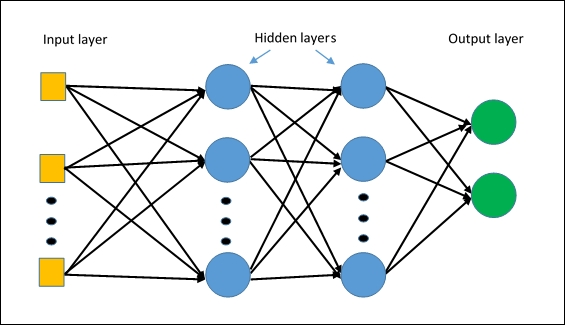

In [15]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [16]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

Using TensorFlow backend.


### Doing one-hot encoding for the output labels:

In [17]:
classes = 10
Y_train = np_utils.to_categorical(y_train, classes)
Y_test = np_utils.to_categorical(y_test, classes)
print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


### Basic Formula

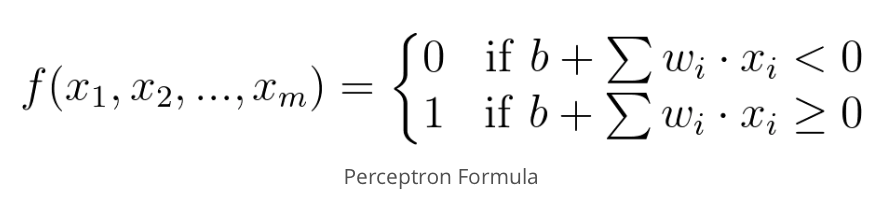

### In Keras, Backpropogation is done internally.

### Implementing the MLP

### Here there is input layer, two hidden layer and output layer.
   a.) no. of nodes in input layer : 784 <br>
   b.) no. of nodes in hidden layer : 512 <br>
   c.) no. of nodes in output layer : 10

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

### Specifying the loss function and which optimizer to use.

In [0]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

### fitting our model

In [73]:
history = model.fit(X_train, Y_train,batch_size=128, epochs=20,verbose=2,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 10s - loss: 0.2536 - acc: 0.9241 - val_loss: 0.1002 - val_acc: 0.9696
Epoch 2/20
 - 10s - loss: 0.1030 - acc: 0.9676 - val_loss: 0.0885 - val_acc: 0.9721
Epoch 3/20
 - 10s - loss: 0.0730 - acc: 0.9774 - val_loss: 0.0694 - val_acc: 0.9777
Epoch 4/20
 - 10s - loss: 0.0575 - acc: 0.9812 - val_loss: 0.0703 - val_acc: 0.9786
Epoch 5/20
 - 10s - loss: 0.0453 - acc: 0.9850 - val_loss: 0.0722 - val_acc: 0.9787
Epoch 6/20
 - 10s - loss: 0.0388 - acc: 0.9872 - val_loss: 0.0622 - val_acc: 0.9822
Epoch 7/20
 - 10s - loss: 0.0361 - acc: 0.9879 - val_loss: 0.0733 - val_acc: 0.9792
Epoch 8/20
 - 10s - loss: 0.0317 - acc: 0.9896 - val_loss: 0.0592 - val_acc: 0.9839
Epoch 9/20
 - 9s - loss: 0.0276 - acc: 0.9911 - val_loss: 0.0604 - val_acc: 0.9833
Epoch 10/20
 - 9s - loss: 0.0256 - acc: 0.9916 - val_loss: 0.0618 - val_acc: 0.9828
Epoch 11/20
 - 9s - loss: 0.0234 - acc: 0.9922 - val_loss: 0.0742 - val_acc: 0.9833
Epoch 12/20
 - 9s - loss: 0

In [74]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.07352156883126088
Test Accuracy 0.9841


### Metrics like Confusion matrix , f1-sx=core, precision, recall

In [75]:
predicted_classes = model.predict_classes(X_test)
calc_report_metrics(predicted_classes,y_test)

Confusion Matrix : 

 [[ 972    1    0    0    1    2    1    2    2    1]
 [   1 1123    1    0    0    0    2    3    0    2]
 [   1    2 1014    3    1    0    0    6    2    0]
 [   0    1    1  994    0   10    0    0    4    5]
 [   0    0    1    0  967    1    1    0    0    9]
 [   0    0    0    5    0  871    3    0    2    2]
 [   3    2    3    0    4    5  951    0    1    1]
 [   1    1    4    4    1    0    0 1011    3    3]
 [   1    5    7    4    1    2    0    3  956    4]
 [   1    0    1    0    7    1    0    3    4  982]]

Accuracy :  0.9841

Precision :  0.984007953822624

Recall :  0.9840143267628505

F1-Score :  0.9839989888005866

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       982
           1       0.99      0.99      0.99      1132
           2       0.98      0.99      0.98      1029
           3       0.98      0.98      0.98      1015
           4       0.98      0.99  

## See which we predicted correctly and which not

In [76]:

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


9841  classified correctly
159  classified incorrectly


### Plotting the incorrect predictions

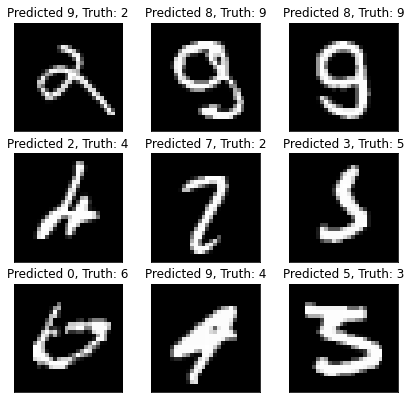

In [77]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)
figure_evaluation = plt.figure()

for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])


## For 3 hidden  layer 

In [0]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [79]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=2,validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 14s - loss: 0.2558 - acc: 0.9227 - val_loss: 0.0983 - val_acc: 0.9690
Epoch 2/10
 - 13s - loss: 0.1128 - acc: 0.9650 - val_loss: 0.0912 - val_acc: 0.9699
Epoch 3/10
 - 13s - loss: 0.0819 - acc: 0.9748 - val_loss: 0.0756 - val_acc: 0.9777
Epoch 4/10
 - 13s - loss: 0.0684 - acc: 0.9786 - val_loss: 0.0758 - val_acc: 0.9781
Epoch 5/10
 - 13s - loss: 0.0543 - acc: 0.9824 - val_loss: 0.0623 - val_acc: 0.9814
Epoch 6/10
 - 13s - loss: 0.0481 - acc: 0.9844 - val_loss: 0.0617 - val_acc: 0.9807
Epoch 7/10
 - 13s - loss: 0.0401 - acc: 0.9872 - val_loss: 0.0647 - val_acc: 0.9824
Epoch 8/10
 - 13s - loss: 0.0386 - acc: 0.9878 - val_loss: 0.0703 - val_acc: 0.9811
Epoch 9/10
 - 13s - loss: 0.0364 - acc: 0.9888 - val_loss: 0.0707 - val_acc: 0.9816
Epoch 10/10
 - 13s - loss: 0.0335 - acc: 0.9899 - val_loss: 0.0623 - val_acc: 0.9833


In [80]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.06225557565679919
Test Accuracy 0.9833


In [81]:
predicted_classes = model.predict_classes(X_test)
calc_report_metrics(predicted_classes,y_test)

Confusion Matrix : 

 [[ 974    0    5    0    0    2    6    0    3    3]
 [   1 1128    0    0    1    0    3    5    0    3]
 [   0    1 1011    4    1    0    2    6    3    0]
 [   2    2    5  998    0    9    1    0    3    2]
 [   0    0    4    0  970    2    8    0    4   11]
 [   0    0    0    0    0  876    3    0    2    1]
 [   1    1    0    0    3    1  934    0    2    0]
 [   0    1    3    3    0    0    0 1011    5    4]
 [   1    2    4    4    0    2    1    3  949    3]
 [   1    0    0    1    7    0    0    3    3  982]]

Accuracy :  0.9833

Precision :  0.983130727014421

Recall :  0.983386357028776

F1-Score :  0.9832282736739961

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       993
           1       0.99      0.99      0.99      1141
           2       0.98      0.98      0.98      1028
           3       0.99      0.98      0.98      1022
           4       0.99      0.97   

### Different activation function (Sigmoid)

In [82]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('sigmoid'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=2,validation_data=(X_test, Y_test))

predicted_classes = model.predict_classes(X_test)
calc_report_metrics(predicted_classes,y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 11s - loss: 0.5596 - acc: 0.8279 - val_loss: 0.2518 - val_acc: 0.9250
Epoch 2/10
 - 9s - loss: 0.2453 - acc: 0.9263 - val_loss: 0.1864 - val_acc: 0.9422
Epoch 3/10
 - 9s - loss: 0.1830 - acc: 0.9443 - val_loss: 0.1404 - val_acc: 0.9584
Epoch 4/10
 - 9s - loss: 0.1419 - acc: 0.9573 - val_loss: 0.1158 - val_acc: 0.9646
Epoch 5/10
 - 9s - loss: 0.1161 - acc: 0.9654 - val_loss: 0.0995 - val_acc: 0.9693
Epoch 6/10
 - 10s - loss: 0.0954 - acc: 0.9707 - val_loss: 0.0854 - val_acc: 0.9729
Epoch 7/10
 - 9s - loss: 0.0805 - acc: 0.9751 - val_loss: 0.0821 - val_acc: 0.9743
Epoch 8/10
 - 9s - loss: 0.0697 - acc: 0.9781 - val_loss: 0.0727 - val_acc: 0.9780
Epoch 9/10
 - 9s - loss: 0.0610 - acc: 0.9807 - val_loss: 0.0716 - val_acc: 0.9777
Epoch 10/10
 - 9s - loss: 0.0533 - acc: 0.9831 - val_loss: 0.0668 - val_acc: 0.9802
Confusion Matrix : 

 [[ 970    0    6    0    1    3    5    1    8    3]
 [   0 1122    0    0    0    1    2    3 

### Changing the No. of nodes in hidden layer to 1024

In [83]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=2,validation_data=(X_test, Y_test))

predicted_classes = model.predict_classes(X_test)
calc_report_metrics(predicted_classes,y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 26s - loss: 0.2134 - acc: 0.9351 - val_loss: 0.1106 - val_acc: 0.9666
Epoch 2/10
 - 25s - loss: 0.0891 - acc: 0.9727 - val_loss: 0.0807 - val_acc: 0.9751
Epoch 3/10
 - 25s - loss: 0.0628 - acc: 0.9801 - val_loss: 0.0799 - val_acc: 0.9755
Epoch 4/10
 - 25s - loss: 0.0506 - acc: 0.9837 - val_loss: 0.0673 - val_acc: 0.9801
Epoch 5/10
 - 25s - loss: 0.0416 - acc: 0.9866 - val_loss: 0.0782 - val_acc: 0.9763
Epoch 6/10
 - 25s - loss: 0.0363 - acc: 0.9881 - val_loss: 0.0642 - val_acc: 0.9826
Epoch 7/10
 - 25s - loss: 0.0298 - acc: 0.9903 - val_loss: 0.0681 - val_acc: 0.9820
Epoch 8/10
 - 25s - loss: 0.0286 - acc: 0.9906 - val_loss: 0.0808 - val_acc: 0.9783
Epoch 9/10
 - 25s - loss: 0.0270 - acc: 0.9908 - val_loss: 0.0683 - val_acc: 0.9832
Epoch 10/10
 - 25s - loss: 0.0248 - acc: 0.9916 - val_loss: 0.0828 - val_acc: 0.9802
Confusion Matrix : 

 [[ 974    1    2    0    0    2    3    1    4    0]
 [   1 1127    0    0    0    0   

### Changing the Optimizer and loss function

In [84]:
model = Sequential()
model.add(Dense(1024, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])
history = model.fit(X_train, Y_train,batch_size=128, epochs=10,verbose=2,validation_data=(X_test, Y_test))

predicted_classes = model.predict_classes(X_test)
calc_report_metrics(predicted_classes,y_test)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 23s - loss: 0.0896 - acc: 0.1378 - val_loss: 0.0882 - val_acc: 0.2630
Epoch 2/10
 - 22s - loss: 0.0875 - acc: 0.2600 - val_loss: 0.0858 - val_acc: 0.4119
Epoch 3/10
 - 22s - loss: 0.0852 - acc: 0.3673 - val_loss: 0.0830 - val_acc: 0.4653
Epoch 4/10
 - 22s - loss: 0.0823 - acc: 0.4260 - val_loss: 0.0795 - val_acc: 0.5073
Epoch 5/10
 - 22s - loss: 0.0789 - acc: 0.4720 - val_loss: 0.0757 - val_acc: 0.5570
Epoch 6/10
 - 22s - loss: 0.0752 - acc: 0.5202 - val_loss: 0.0714 - val_acc: 0.6061
Epoch 7/10
 - 22s - loss: 0.0712 - acc: 0.5721 - val_loss: 0.0668 - val_acc: 0.6520
Epoch 8/10
 - 21s - loss: 0.0669 - acc: 0.6218 - val_loss: 0.0621 - val_acc: 0.6909
Epoch 9/10
 - 22s - loss: 0.0625 - acc: 0.6580 - val_loss: 0.0573 - val_acc: 0.7226
Epoch 10/10
 - 22s - loss: 0.0582 - acc: 0.6876 - val_loss: 0.0527 - val_acc: 0.7445
Confusion Matrix : 

 [[ 951    0   35   10    6  193   45    8   32   29]
 [   0 1121   92   12   30   99   

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 2. Implementing CNN (Convolution neural network)

In deep learning, a convolutional neural network (CNN, or ConvNet) is a class of deep neural networks, most commonly applied to analyzing visual imagery. 

CNNs are regularized versions of multilayer perceptrons. Multilayer perceptrons usually mean fully connected networks, that is, each neuron in one layer is connected to all neurons in the next layer. The "fully-connectedness" of these networks makes them prone to overfitting data.

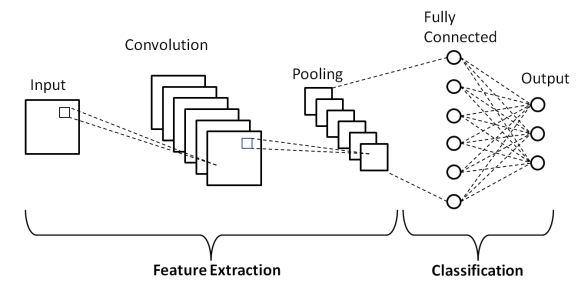

Importing the required libraries

In [0]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

In [0]:
X_train_cnn=X_train.reshape(60000,28,28,1)
X_test_cnn=X_test.reshape(10000,28,28,1)

### Plotting the data

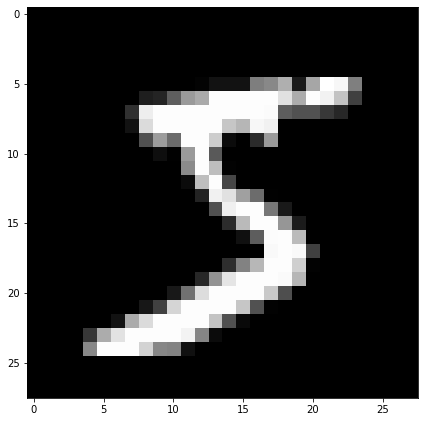

In [34]:
plt.imshow(X_train_cnn[0].reshape(28,28),cmap='gray')

### Implementing the CNN Model

In [35]:
#CNN model
model = Sequential()
model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [36]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_4 (Activation)    (None, 10)               

In [40]:
model.fit(X_train_cnn,Y_train,epochs=20,validation_data=(X_test_cnn, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 46s 762us/step - loss: 0.2085 - acc: 0.9368 - val_loss: 0.0731 - val_acc: 0.9768
Epoch 2/20
60000/60000 [==============================] - 45s 753us/step - loss: 0.0925 - acc: 0.9725 - val_loss: 0.0568 - val_acc: 0.9808
Epoch 3/20
60000/60000 [==============================] - 45s 754us/step - loss: 0.0754 - acc: 0.9775 - val_loss: 0.0509 - val_acc: 0.9841
Epoch 4/20
60000/60000 [==============================] - 45s 754us/step - loss: 0.0661 - acc: 0.9801 - val_loss: 0.0516 - val_acc: 0.9847
Epoch 5/20
60000/60000 [==============================] - 45s 750us/step - loss: 0.0578 - acc: 0.9827 - val_loss: 0.0495 - val_acc: 0.9841
Epoch 6/20
60000/60000 [==============================] - 46s 762us/step - loss: 0.0547 - acc: 0.9831 - val_loss: 0.0447 - val_acc: 0.9845
Epoch 7/20
60000/60000 [==============================] - 45s 757us/step - loss: 0.0490 - acc: 0.9859 - val_loss: 0.

In [41]:
model.evaluate(X_test_cnn,Y_test)

10000/10000 [==============================] - 2s 217us/step


[0.05102743995821038, 0.9852]

In [43]:
loss_and_metrics = model.evaluate(X_test_cnn, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.05102743995821038
Test Accuracy 0.9852


### Showing the metrics

In [44]:
predicted_classes = model.predict_classes(X_test_cnn)
calc_report_metrics(predicted_classes,y_test)

Confusion Matrix : 

 [[ 971    0    1    0    0    1    4    0    4    0]
 [   0 1133    2    0    1    0    3    3    1    2]
 [   2    0 1016    1    0    0    0    9    2    0]
 [   1    1    3  995    0    4    1    4    2    2]
 [   0    0    1    0  968    0    1    0    0    3]
 [   1    0    0    9    0  883    5    0    3   11]
 [   3    0    1    0    5    3  942    0    2    0]
 [   0    0    5    2    1    0    0 1007    2    6]
 [   2    1    2    3    1    1    2    1  955    3]
 [   0    0    1    0    6    0    0    4    3  982]]

Accuracy :  0.9852

Precision :  0.9850956714339446

Recall :  0.985020903505809

F1-Score :  0.9850368656283728

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       981
           1       1.00      0.99      0.99      1145
           2       0.98      0.99      0.99      1030
           3       0.99      0.98      0.98      1013
           4       0.99      0.99  

for 2 convolution layer and 2 max pool layer 
and 1 fully dense layer

### With 2 convolution layer

In [0]:
model = Sequential()

model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adadelta', metrics = ['accuracy'])

In [48]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               102500    
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)              

In [49]:
model.fit(X_train_cnn,Y_train,epochs=10,validation_data=(X_test_cnn, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1544 - acc: 0.9518 - val_loss: 0.0382 - val_acc: 0.9878
Epoch 2/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0537 - acc: 0.9842 - val_loss: 0.0303 - val_acc: 0.9899
Epoch 3/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0406 - acc: 0.9879 - val_loss: 0.0284 - val_acc: 0.9914
Epoch 4/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.0313 - acc: 0.9906 - val_loss: 0.0236 - val_acc: 0.9923
Epoch 5/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0255 - acc: 0.9922 - val_loss: 0.0256 - val_acc: 0.9915
Epoch 6/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0221 - acc: 0.9931 - val_loss: 0.0226 - val_acc: 0.9929
Epoch 7/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.0182 - acc: 0.9943 - val_loss: 0.0230 - val_acc

In [50]:
model.evaluate(X_test_cnn,Y_test)

10000/10000 [==============================] - 4s 376us/step


[0.027417281055518515, 0.9917]

In [51]:
loss_and_metrics = model.evaluate(X_test_cnn, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.027417281055518515
Test Accuracy 0.9917


In [52]:
predicted_classes = model.predict_classes(X_test_cnn)
calc_report_metrics(predicted_classes,y_test)

Confusion Matrix : 

 [[ 978    0    1    0    0    0    2    0    1    0]
 [   1 1132    0    0    0    0    2    2    0    2]
 [   0    0 1026    1    1    1    0    4    2    0]
 [   0    1    0 1006    0    6    1    0    1    3]
 [   0    1    0    0  971    0    2    0    0    5]
 [   0    0    0    3    0  883    1    0    1    8]
 [   0    0    0    0    0    1  949    0    0    0]
 [   1    0    5    0    0    1    0 1021    2    3]
 [   0    1    0    0    1    0    1    0  964    1]
 [   0    0    0    0    9    0    0    1    3  987]]

Accuracy :  0.9917

Precision :  0.9915975729809515

Recall :  0.9916815421173221

F1-Score :  0.9916314151899692

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       982
           1       1.00      0.99      1.00      1139
           2       0.99      0.99      0.99      1035
           3       1.00      0.99      0.99      1018
           4       0.99      0.99 

### With 2 hidden layers

In [0]:
model = Sequential()

model.add(Convolution2D(32,3,data_format='channels_last',activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(100))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('tanh'))
model.add(Activation('softmax'))
model.compile(loss='mean_squared_error', optimizer = 'sgd', metrics = ['accuracy'])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               540900    
_________________________________________________________________
dropout_5 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)              

In [67]:
model.fit(X_train_cnn,Y_train,epochs=10,validation_data=(X_test_cnn, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 40s 660us/step - loss: 0.0872 - acc: 0.2553 - val_loss: 0.0826 - val_acc: 0.6548
Epoch 2/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0798 - acc: 0.5145 - val_loss: 0.0725 - val_acc: 0.7489
Epoch 3/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0732 - acc: 0.5989 - val_loss: 0.0646 - val_acc: 0.7979
Epoch 4/10
60000/60000 [==============================] - 39s 650us/step - loss: 0.0691 - acc: 0.6382 - val_loss: 0.0596 - val_acc: 0.8287
Epoch 5/10
60000/60000 [==============================] - 39s 648us/step - loss: 0.0662 - acc: 0.6692 - val_loss: 0.0562 - val_acc: 0.8396
Epoch 6/10
60000/60000 [==============================] - 39s 649us/step - loss: 0.0641 - acc: 0.6905 - val_loss: 0.0538 - val_acc: 0.8478
Epoch 7/10
60000/60000 [==============================] - 39s 651us/step - loss: 0.0622 - acc: 0.7137 - val_loss: 0.

In [68]:
model.evaluate(X_test_cnn,Y_test)

10000/10000 [==============================] - 2s 222us/step


[0.04897084094285965, 0.8662]

In [69]:
loss_and_metrics = model.evaluate(X_test_cnn, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.04897084094285965
Test Accuracy 0.8662


In [70]:
predicted_classes = model.predict_classes(X_test_cnn)
calc_report_metrics(predicted_classes,y_test)

Confusion Matrix : 

 [[ 958    0   15    6    1   38   16    4   21   19]
 [   0 1105   13    7   10   12    6   30   35   10]
 [   1    7  880   33    6    6    4   33   15    9]
 [   2    2   16  896    0  158    1    4   36   19]
 [   1    1   12    1  833   35    4   13   14   31]
 [   1    1    0    7    1  535   15    0   14    4]
 [   8    5   27    8   22   36  908    4   25    0]
 [   1    1   23   22    2   10    1  902   18   41]
 [   8   13   38   19   12   46    3    3  776    7]
 [   0    0    8   11   95   16    0   35   20  869]]

Accuracy :  0.8662

Precision :  0.8622208997383618

Recall :  0.8688452598820857

F1-Score :  0.861093832553404

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.89      0.93      1078
           1       0.97      0.90      0.94      1228
           2       0.85      0.89      0.87       994
           3       0.89      0.79      0.84      1134
           4       0.85      0.88  

## 3. Implementing SVM

### **SVM (Image Classifiction)**

In machine learning, support-vector machines (SVMs, also support-vector networks[1]) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis


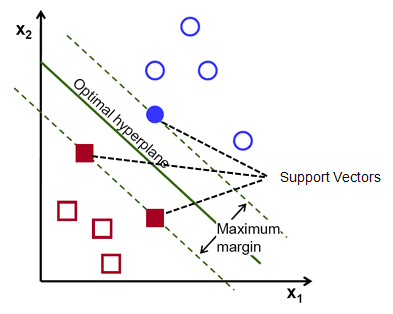

### Importing the libraries

In [0]:
from sklearn.decomposition import PCA
from sklearn import svm

### Applying the PCA

In [0]:
pca = PCA(100)
pca.fit(X_train)
train=pca.transform(X_train)
test=pca.transform(X_test)

### With RBF kernel and **C=1.0**

In [0]:
# non-linear model using rbf kernel, C=1, default value of gamma

classifier = svm.SVC(kernel='rbf')
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [57]:
pred=classifier.predict(X_test)
calc_report_metrics(y_test,pred)

Confusion Matrix : 

 [[ 973    0    1    0    0    2    1    1    2    0]
 [   0 1126    3    1    0    1    1    1    2    0]
 [   6    1 1006    2    1    0    2    7    6    1]
 [   0    0    2  995    0    2    0    5    5    1]
 [   0    0    5    0  961    0    3    0    2   11]
 [   2    0    0    9    0  871    4    1    4    1]
 [   6    2    0    0    2    3  944    0    1    0]
 [   0    6   11    1    1    0    0  996    2   11]
 [   3    0    2    6    3    2    2    3  950    3]
 [   3    4    1    7   10    2    1    7    4  970]]

Accuracy :  0.9792

Precision :  0.9791973966593345

Recall :  0.9790919842945065

F1-Score :  0.9791298259748042

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98 

### With Linear Kernel

In [0]:
classifier = svm.SVC(kernel='linear')

classifier.fit(train, y_train)

y_pred = classifier.predict(test)

In [60]:
pred=classifier.predict(test)
calc_report_metrics(y_test,pred)

Confusion Matrix : 

 [[ 966    0    0    3    1    6    3    1    0    0]
 [   0 1124    4    1    0    1    1    1    3    0]
 [   8    2  978    7    8    4    6    7   12    0]
 [   3    0   20  942    0   15    2   11   14    3]
 [   1    0    9    0  937    0    7    1    3   24]
 [   9    5    4   37    6  798   11    1   19    2]
 [   6    3    8    0    3   14  922    1    1    0]
 [   1    7   19    6   11    0    1  963    0   20]
 [   5    3    6   24    7   31    7    7  882    2]
 [   4    6    3   10   33    7    0   21    5  920]]

Accuracy :  0.9432

Precision :  0.9424872615984125

Recall :  0.9421694471581509

F1-Score :  0.9422035243461474

Classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.95      0.94      1032
           3       0.91      0.93      0.92      1010
           4       0.93      0.95 

### With Sigmoid kernel

In [0]:
classifier = svm.SVC(kernel='sigmoid')

classifier.fit(train, y_train)

y_pred = classifier.predict(test)

In [62]:
pred=classifier.predict(test)
calc_report_metrics(y_test,pred)


Confusion Matrix : 

 [[ 910    0    9    4    1   34   18    2    2    0]
 [   0 1078   28    7    0    4    2    1   15    0]
 [  32   31  819   26   20    7   39   11   42    5]
 [  18    2   27  837    1   68    5   19   24    9]
 [   4    3    6    1  861    1   13   11    4   78]
 [  44   17   12   85   18  662   13    5   30    6]
 [  36    3   40    3   16   29  826    0    5    0]
 [   5   18   31   14   12    2    1  896    1   48]
 [  31   39   20   38   12   55   19   13  732   15]
 [  14    6    2   16   77   13    0   79   19  783]]

Accuracy :  0.8404

Precision :  0.838400620839125

Recall :  0.8380967403189026

F1-Score :  0.8375103855638854

Classification Report : 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       980
           1       0.90      0.95      0.92      1135
           2       0.82      0.79      0.81      1032
           3       0.81      0.83      0.82      1010
           4       0.85      0.88  

### With RBF kernel and **C=5.0**

In [63]:
classifier = svm.SVC(kernel='rbf',C=5.0)
classifier.fit(train, y_train)
y_pred = classifier.predict(test)
pred=classifier.predict(test)
calc_report_metrics(y_test,pred)

Confusion Matrix : 

 [[ 975    0    1    0    0    1    0    1    2    0]
 [   0 1131    2    1    0    1    0    0    0    0]
 [   5    1 1014    0    1    0    2    5    4    0]
 [   0    0    3  995    1    3    0    3    4    1]
 [   1    0    1    0  966    0    4    1    0    9]
 [   2    0    0    4    1  879    3    0    1    2]
 [   4    2    0    0    1    2  947    0    2    0]
 [   0    3   11    1    0    0    0 1007    1    5]
 [   3    0    1    2    1    1    1    2  959    4]
 [   1    2    0    6    8    3    1    5    0  983]]

Accuracy :  0.9856

Precision :  0.985553578572641

Recall :  0.9855134346287187

F1-Score :  0.9855287136948014

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98  

### With RBF kernel and **C=10.0**

In [64]:
classifier = svm.SVC(kernel='rbf',C=10.0)
classifier.fit(train, y_train)
y_pred = classifier.predict(test)
pred=classifier.predict(test)
calc_report_metrics(y_test,pred)

Confusion Matrix : 

 [[ 975    0    1    0    0    1    0    1    2    0]
 [   0 1129    2    1    0    1    0    1    1    0]
 [   5    1 1014    0    1    0    2    5    4    0]
 [   0    0    3  995    1    3    0    3    4    1]
 [   1    0    1    0  966    0    4    1    0    9]
 [   2    0    0    5    1  878    3    0    1    2]
 [   4    2    0    0    1    2  948    0    1    0]
 [   0    3   10    2    0    0    0 1008    0    5]
 [   3    0    1    2    1    1    1    2  960    3]
 [   1    2    0    6    6    3    1    5    0  985]]

Accuracy :  0.9858

Precision :  0.9857643069032406

Recall :  0.9857276614098771

F1-Score :  0.9857413474139541

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.99      0.98 

### Comparing and choosing the best one

After comparing the accuracy and other metrics, 
###    CNN performs very well with 99% accuracy.

    MLP Accuracy : 98%

    SVM Accuracy : 97%

    But CNN Accuracy : 99%

## Best model is CNN after this experiment.